# Kaggle API

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d carrie1/ecommerce-data

 69% 5.00M/7.20M [00:00<00:00, 43.4MB/s]
100% 7.20M/7.20M [00:00<00:00, 45.9MB/s]


In [ ]:
!unzip ecommerce-data.zip

Archive:  ecommerce-data.zip
  inflating: data.csv                


# Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Dataset

In [ ]:
df = pd.read_csv('data.csv',encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# EDA - Purchase Behaviour Analysis

## Checking shape of data

In [ ]:
# checking the shape of the dataset
df.shape

(541909, 8)

**Observations**

1. There are 8 columns.
2. There are 5,41,909 rows.

## Checking null count and dtypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


***Observations***

1. 5 nominal columns.
2. 3 numerical columns.
3. Description and CustomerID are the only feature with missing values.

In [ ]:
print(df['Description'].isna().sum())
# total 1454 missing values
print(df[df['Description'].isna()]['Country'].unique())
# all the missing description values are from UK
print(df[df['Description'].isna()]['UnitPrice'].unique())
# all of them have a unit price of 0
print(df[df['Description'].isna()]['CustomerID'].unique())
# all of them also have a missing customer ID

1454
['United Kingdom']
[0.]
[nan]


In [ ]:
print(df['CustomerID'].isna().sum())
df[df['CustomerID'].isna()]['Country'].unique()

135080


array(['United Kingdom', 'EIRE', 'Bahrain', 'Israel', 'Hong Kong',
       'Unspecified', 'France', 'Switzerland', 'Portugal'], dtype=object)

In [ ]:
print('Percentage missing values:')
print(df.isna().sum()/len(df)*100)

Percentage missing values:
InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


***Observations***

As about 25% of the transactions have missing customer ID it'll be hard to decipher who actually made the purchase.

## Checking InvoiceNo

- Invoice number
- Nominal
- 6-digit integral number uniquely assigned to each transaction
- If this code starts with letter 'c', it indicates a cancellation.

In [ ]:
df.InvoiceNo.isna().sum()

0

In [ ]:
df.InvoiceNo.dtype

dtype('O')

In [ ]:
df.InvoiceNo.value_counts()
# There are repeated invoice numbers

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
C580604       1
C551330       1
C555354       1
571102        1
C541498       1
Name: InvoiceNo, Length: 25900, dtype: int64

In [ ]:
# checking the number of transactions by counting the unique invoice numbers
print('The no. of transactions in the dataset are',len(df.InvoiceNo.unique()))

The no. of transactions in the dataset are 25900


In [ ]:
from collections import Counter

lst = []
for element in df.InvoiceNo:
  if len(element) == 7:
    lst.append(element[0])

Counter(lst)
# There are several cancelations termed C.
# This could mean that the 6 digit code after the alphabet
# may correspond to a previous invoice number

Counter({'A': 3, 'C': 9288})

In [ ]:
# What is 'A'
df[[i[0]=='A' for i in df.InvoiceNo]]
# The invoice numbers having A in the beginning means
# they have adjust bad debt
# It seems someone was trying to order an item but the order kept failing

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [ ]:
# What is 'C': It's Cancellation
df[[i[0]=='C' for i in df.InvoiceNo]].head()
# The negative quantity showcases that the items had been returned.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [ ]:
# checking rows above and below the canceled order
df.sort_values(by='CustomerID').head(2)

# There is a clear indication invoice no. has changed
# but it's the same order being returned.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom


## Treating null

In [ ]:
# The missing values can be dropped
dfn = df.dropna().reset_index()

In [ ]:
dfn.isna().sum().sum()

0

## Changing InvoiceDate to datetime

In [ ]:
# changing the invoice date column to datetime
dfn['InvoiceDate'] = pd.to_datetime(dfn['InvoiceDate'])

In [ ]:
# checking count of the orders per country

dfn['Country'].value_counts()
# majority orders from UK
# Most of the data points are from Europe followed by Australia

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [ ]:
# Checking the different products

print('There are',len(df['StockCode'].unique()),'unique products')

There are 4070 unique products


In [ ]:
# Counting the different customers

print('There are',len(df['CustomerID'].unique()),'unique customers')
# Note: This is not accurate as there are approx 25% missing customer IDs.
# Hence the no. of customers may well be more than this postulated no. but not less.

There are 4373 unique customers


In [ ]:
# a few columns like cost[of the total order], day, month, year etc can be added
dfn['Cost'] = dfn['Quantity']*dfn['UnitPrice']

In [ ]:
dfn['Year'] = dfn['InvoiceDate'].map(lambda x:x.year)
dfn['Month'] = dfn['InvoiceDate'].map(lambda x:x.month)
dfn['Day'] = dfn['InvoiceDate'].map(lambda x:x.day)
dfn['Hour'] = dfn['InvoiceDate'].map(lambda x:x.hour)

In [ ]:
dfn['Weekday'] = dfn['InvoiceDate'].map(lambda x:x.dayofweek)

# Checking top 5 customer orders

In [ ]:
dfn.groupby('Country')['Cost'].sum().sort_values(ascending=False).head()

# the UK has been the top spender followed by Netherland,
## Ireland, Germany and France.

# But as there are more customers from UK alone hence the total cost
## might not provide a clear image.

Country
United Kingdom    6.767873e+06
Netherlands       2.846615e+05
EIRE              2.502852e+05
Germany           2.216982e+05
France            1.967128e+05
Name: Cost, dtype: float64

In [ ]:
dfn.groupby('Country')['Cost'].mean().sort_values(ascending=False).head()

# looking at the average spending per customer per country
## Netherland outperforms the rest by quite a margin.

# The top 5 in terms of average spending doesn't include UK
## hinting at the fact that the customers in UK might be focusing 
## on buying cheap or daily purchase items as the company is based
## in UK while the rest are focussing more on luxury goods.

# The other countries are Australia, Japan, Sweden and Denmark.

Country
Netherlands    120.059696
Australia      108.877895
Japan           98.716816
Sweden          79.211926
Denmark         48.247147
Name: Cost, dtype: float64

In [ ]:
dfn.groupby(
    ['CustomerID','Country']
    )['InvoiceNo'].count().sort_values(ascending=False).head()

# The customers having the most orders have been from UK and Ireland.


CustomerID  Country       
17841.0     United Kingdom    7983
14911.0     EIRE              5903
14096.0     United Kingdom    5128
12748.0     United Kingdom    4642
14606.0     United Kingdom    2782
Name: InvoiceNo, dtype: int64

In [ ]:
dfn.groupby(
    ['CustomerID','Country']
    )['Cost'].sum().sort_values(ascending=False).head()

# The top spender has been a customer from Netherlands
## with UK, Ireland and Australia in tow.

# The Irish customer with the second most orders is also
## 4th in terms of total amount spent.

CustomerID  Country       
14646.0     Netherlands       279489.02
18102.0     United Kingdom    256438.49
17450.0     United Kingdom    187482.17
14911.0     EIRE              132572.62
12415.0     Australia         123725.45
Name: Cost, dtype: float64

# Checking sales over time

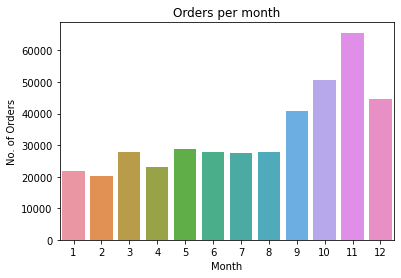

In [ ]:
sns.countplot(x=dfn['Month'])
plt.ylabel('No. of Orders')
plt.title('Orders per month')
plt.show()

# The month of november has the highest number of orders
## followed by october and december

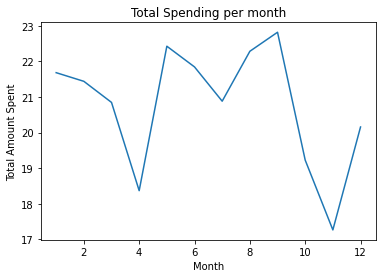

In [ ]:
dfn.groupby(['Month'])['Cost'].mean().plot()
plt.ylabel('Total Amount Spent')
plt.title('Total Spending per month')
plt.show()

# In case of average spending per month november appears to be an
## underperformer.

# Overall all the month have almost equal average spending.

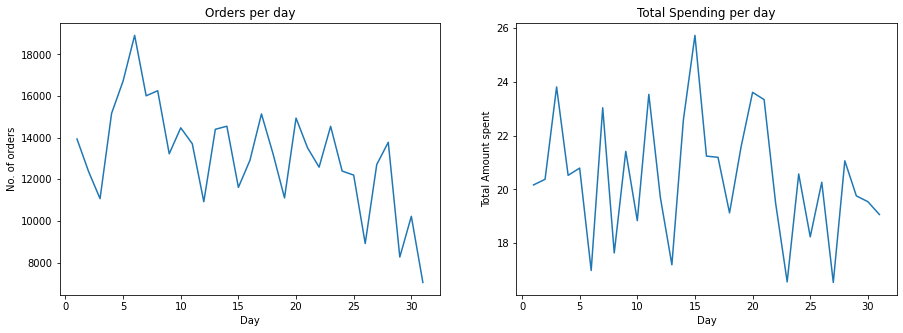

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
dfn.groupby(['Day'])['InvoiceNo'].count().plot()
plt.ylabel('No. of orders')
plt.title('Orders per day')

plt.subplot(122)
dfn.groupby(['Day'])['Cost'].mean().plot()
plt.ylabel('Total Amount spent')
plt.title('Total Spending per day')

plt.show()

# The number of orders seems to have a peak aound the first weekend
## and dips by the month end.

# This can be attributed to the fact that the paycheck mostly arrives 
## in the first week leading to people going on a spend spree
## while turning conservative and saving what remains by the month end.

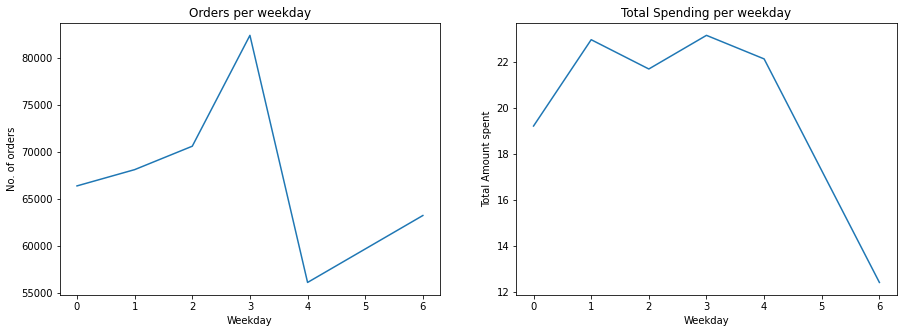

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
dfn.groupby(['Weekday'])['InvoiceNo'].count().plot()
plt.ylabel('No. of orders')
plt.title('Orders per weekday')

plt.subplot(122)
dfn.groupby(['Weekday'])['Cost'].mean().plot()
plt.ylabel('Total Amount spent')
plt.title('Total Spending per weekday')

plt.show()

# The number of orders reaches a high around wednesday
## and lowest on thursday

# Total spending stays high throughout high except for the weekend

# The lull on the weekends can be attributed to them being holidays
## allowing people to physically go and purchase what is needed.

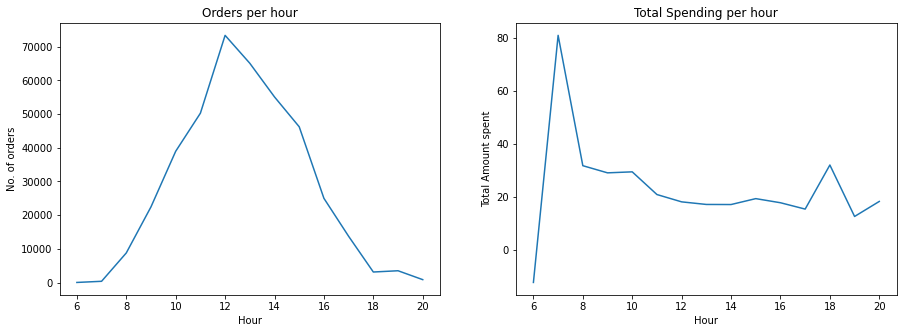

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
dfn.groupby(['Hour'])['InvoiceNo'].count().plot()
plt.ylabel('No. of orders')
plt.title('Orders per hour')

plt.subplot(122)
dfn.groupby(['Hour'])['Cost'].mean().plot()
plt.ylabel('Total Amount spent')
plt.title('Total Spending per hour')

plt.show()

# The number of orders follows a normal distribution wrt hours

# It peaks at around 12 pm.

# There is a peculiar bump in the average amount spent per hour at 
## the 6am to 8 am mark suggesting customers on average spend more 
## in the first half of the day with a gradual decrease and a bump 
## later on in the night

# This can be attributed to the working hours. This'll lead the 
## customers to be active right before office and once they return.

# A look into canceled orders

In [ ]:
cancel = dfn[[i[0]=='C' for i in dfn.InvoiceNo]]

# most of the cancelations have been removed due to missing CustomerID.

In [ ]:
cancel.StockCode.value_counts().head(10)

# Cancelations have been for these specific products suggesting 
## bad quality which can lead to bad reviews.

# cancelations with D mean discount, suggesting that there have been
## refunds for a purchase and hence are not cancelations

# M and POST mean Manual delivery and Postage delivery which might 
## suggest problems with transportation.

22423    181
M        175
POST      97
22960     86
D         77
22720     73
21232     61
22699     53
22197     50
22666     47
Name: StockCode, dtype: int64

In [ ]:
cancel.groupby('Country')['Cost'].sum().sort_values(ascending=True).head()

# most cancelations have been in the UK
# Ireland, France, Singapore and Germany in tow.

Country
United Kingdom   -540518.16
EIRE              -15260.68
France            -12311.21
Singapore         -12158.90
Germany            -7168.93
Name: Cost, dtype: float64

In [ ]:
cancel.groupby('Country')['Cost'].mean().sort_values(ascending=True).head()

# The average cost based on cancelation has been highest from Singapore.

# UK doesn't show up again. This can be due to costlier purchases made 
## by customers overseas and canceling them.

Country
Singapore   -1736.985714
Portugal     -243.337778
Sweden       -162.038182
Spain        -141.719375
Israel       -113.720000
Name: Cost, dtype: float64

In [ ]:
cancel.groupby(
    ['CustomerID','Country']
    )['InvoiceNo'].count().sort_values(ascending=False).head()

# There are a few customers with multiple cancelations from Ireland,
## UK and USA.

CustomerID  Country       
14911.0     EIRE              226
17841.0     United Kingdom    136
17511.0     United Kingdom    113
15311.0     United Kingdom    112
12607.0     USA               101
Name: InvoiceNo, dtype: int64

In [ ]:
cancel.groupby(
    ['CustomerID','Country']
    )['Cost'].sum().sort_values(ascending=True).head()

CustomerID  Country       
16446.0     United Kingdom   -168469.60
12346.0     United Kingdom    -77183.60
15098.0     United Kingdom    -39267.00
16029.0     United Kingdom    -30032.23
15749.0     United Kingdom    -22998.40
Name: Cost, dtype: float64

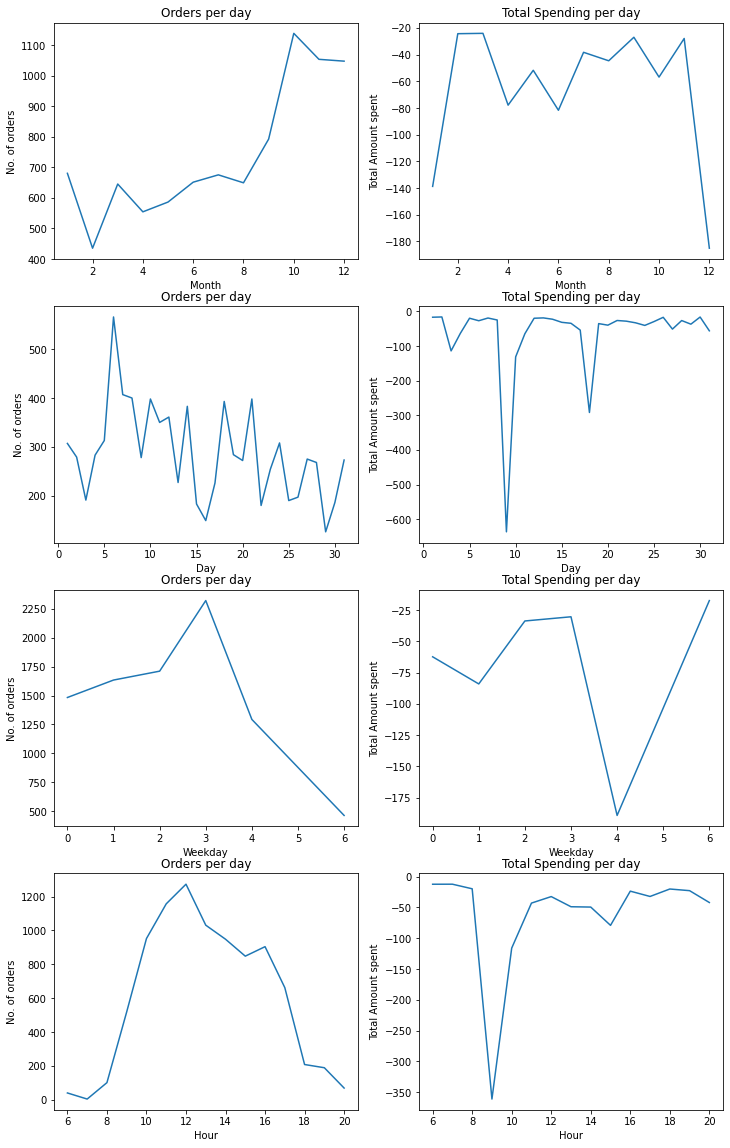

In [ ]:
plt.figure(figsize=(12,20))
plt.subplot(421)
cancel.groupby(['Month'])['InvoiceNo'].count().plot()
plt.ylabel('No. of orders')
plt.title('Orders per day')

plt.subplot(422)
cancel.groupby(['Month'])['Cost'].mean().plot()
plt.ylabel('Total Amount spent')
plt.title('Total Spending per day')

plt.subplot(423)
cancel.groupby(['Day'])['InvoiceNo'].count().plot()
plt.ylabel('No. of orders')
plt.title('Orders per day')

plt.subplot(424)
cancel.groupby(['Day'])['Cost'].mean().plot()
plt.ylabel('Total Amount spent')
plt.title('Total Spending per day')

plt.subplot(425)
cancel.groupby(['Weekday'])['InvoiceNo'].count().plot()
plt.ylabel('No. of orders')
plt.title('Orders per day')

plt.subplot(426)
cancel.groupby(['Weekday'])['Cost'].mean().plot()
plt.ylabel('Total Amount spent')
plt.title('Total Spending per day')

plt.subplot(427)
cancel.groupby(['Hour'])['InvoiceNo'].count().plot()
plt.ylabel('No. of orders')
plt.title('Orders per day')

plt.subplot(428)
cancel.groupby(['Hour'])['Cost'].mean().plot()
plt.ylabel('Total Amount spent')
plt.title('Total Spending per day')

plt.show()

# The cancelations have a trend matching that of the rest of the dataset

# This signifies that the customers tend to place orders and cancel them
## and replace them as they go through the website suggesting a trend.